## Regression problem
In the following cell, you see how easy is to pass through a line to a series of data points that are pretty much aligned.

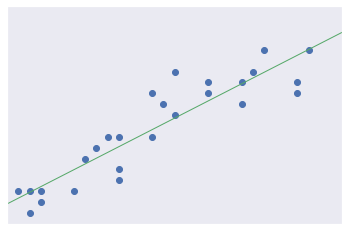

In [5]:
# Plot an example of linear regression.

import numpy as np


def predict(X, w, b):
    return X * w + b


def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)


def gradient(X, Y, w, b):
    w_gradient = 2 * np.average(X * (predict(X, w, b) - Y))
    b_gradient = 2 * np.average(predict(X, w, b) - Y)
    return (w_gradient, b_gradient)


def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b


X = np.array([13., 2., 14., 23., 13., 1., 18., 10., 26., 3., 3., 21., 7.,
              22., 2., 27., 6., 10., 18., 15., 9., 26., 8., 15., 10., 21.])
Y = np.array([12., 3., 11., 16., 8., 3., 12., 4., 13., 2., 3., 11., 6.,
              14., 1., 16., 3., 5., 13., 10., 8., 12., 7., 14., 8., 13.])
w, b = train(X, Y, iterations=100000, lr=0.001)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(X, Y, "bo")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
x_edge, y_edge = 30, 20
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")
plt.show()


## Categorical problem
Now let's see how we can pass a line to a binary classification problem:

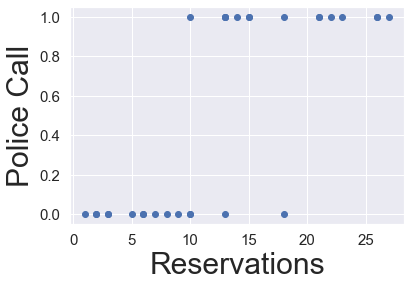

In [6]:
# Plot a dataset with a boolean categorical value.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X, _, _, Y = np.loadtxt("police.txt", skiprows=1, unpack=True)

plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Police Call", fontsize=30)

plt.show()

We cannot fit a line (linear regression) for categorical data shown above. We need an approximation that nicely fits the data point. For that we wrap up the result of weighted sum by the sigmoid function, shown below.

## Sigmoid function
We use the sigmoid function to smooth out a model to pass through our data. We need that during traing phase and to be able to generate error. In DL, this is part of what we call "activation function" and it does the same thing, it changes the result of neuron to a non-linear form.

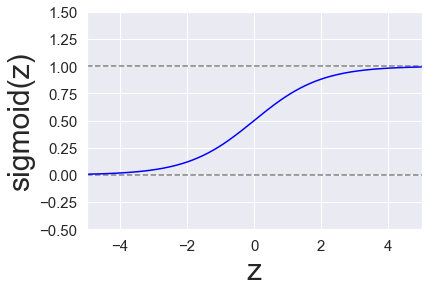

In [7]:
# Plot the sigmoid function in 2 dimensions.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


MARGIN_LEFT = -5
MARGIN_RIGHT = 5

# Configure axes
plt.axis([MARGIN_LEFT, MARGIN_RIGHT, -0.5, 1.5])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Plot margins
plt.plot([MARGIN_LEFT, MARGIN_RIGHT], [1, 1], color="grey", linestyle="dashed")
plt.plot([MARGIN_LEFT, MARGIN_RIGHT], [0, 0], color="grey", linestyle="dashed")

# Plot sigmoid
X = np.linspace(MARGIN_LEFT, MARGIN_RIGHT, 200)
Y = [sigmoid(x) for x in X]
plt.xlabel("z", fontsize=30)
plt.ylabel("sigmoid(z)", fontsize=30)
plt.plot(X, Y, color="blue")

plt.show()


Now, let's use the sigmoid function for the sample data point we have.

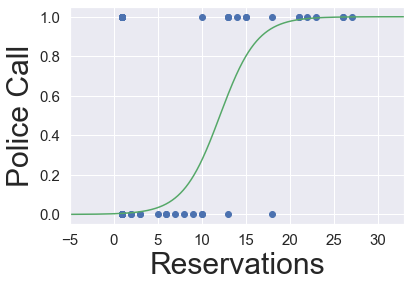

In [8]:
# Plot an example of classification.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# we wrap up the result of weighted sum into the sigmoid function. The result is a number between 
# 0 and 1 and a smoother curve that fits better to data points compare to linear regression.
# We use that curve during training to find the loss function
# Later we plot the forward function
def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

# We round the returned value of the forward() function for "classification". We plot it later.
def classify(X, w):
    return np.round(forward(X, w))

# We could use MSE for the loss function but there is a problem to use it, so instead we use logloss function.
# Later in the next cell, I show the problem of using MSE for the classification problems
# We use the returned value of the forward() function to calculate the loss. 
# We use the loglos 

def loss(X, Y, w):
    y_hat = forward(X, w)
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)

# As you see, to train the model, we use the smooter plot that was generated by the forward() function
def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X, w) - Y)) / X.shape[0]


def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        w -= gradient(X, Y, w) * lr
    return w


x1, _, _, y = np.loadtxt("police.txt", skiprows=1, unpack=True)
X = np.column_stack((np.ones(x1.size), x1))
Y = y.reshape(-1, 1)
w = train(X, Y, iterations=1000000, lr=0.01)

plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Police Call", fontsize=30)
MARGIN = 3
left_edge = X[:, 1].min() - MARGIN
right_edge = X[:, 1].max() + MARGIN
inputs = np.linspace(left_edge - MARGIN, right_edge + MARGIN, 2500)
x_values = np.column_stack((np.ones(inputs.size), inputs.reshape(-1, 1)))

# Uncomment one of the two lines below to plot the model with/without the rounding introduced by classify()

y_values = forward(x_values, w)   # no rounding, used during training 
#y_values = classify(x_values, w)  # rounded, used during classification

plt.axis([left_edge - MARGIN, right_edge + MARGIN, -0.05, 1.05])
plt.plot(x_values[:, 1], y_values, color="g")
plt.show()


I show you why using SME is not a good idea and instead we use Loglos for the classification problem.

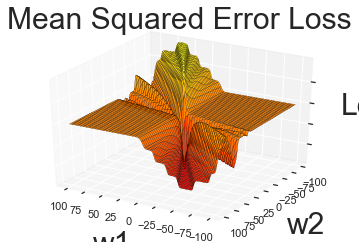

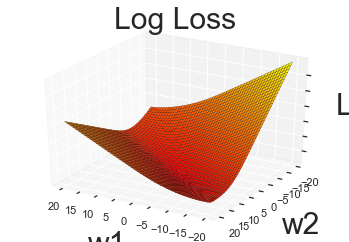

In [15]:
# Plot a datasets' losses calculated with the MSE and log loss formulae.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)


def mse_loss(X, Y, w):
    return np.average((forward(X, w) - Y) ** 2)

# Since MSE plot has canyons we may lead to find local minimum than global minimum. So we use the log_loss
# to calculate the lost. See two plots below. 
def log_loss(X, Y, w):
    y_hat = sigmoid(np.matmul(X, w))
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)


def prepare_axes():
    ax = plt.figure().gca(projection="3d")
    ax.clear()
    ax.set_zticklabels(())
    ax.set_xlabel("w1", labelpad=15, fontsize=30)
    ax.set_ylabel("w2", labelpad=15, fontsize=30)
    ax.set_zlabel("Loss", labelpad=15, fontsize=30)
    ax.view_init(30, 120)
    return ax


# Come up with some plausible data
n_examples = 20
np.random.seed(1234)
X = np.random.rand(n_examples, 2)
w = [1.23, 2.34]
Y = np.dot(X, w)
Y_binary = np.greater_equal(Y, np.median(Y)).astype(int)

# Prepare plot
MESH_SIZE = 400
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})

# Plot mean squared error loss
ax = prepare_axes()
plt.title("Mean Squared Error Loss", fontsize=30)
view_range = 100    # Wide range to see the creeks and valleys
W1, W2 = np.meshgrid(np.linspace(-view_range, view_range, MESH_SIZE),
                     np.linspace(-view_range, view_range, MESH_SIZE))
losses = np.array([mse_loss(X, Y_binary, [w1, w2]) for w1, w2
                   in zip(np.ravel(W1), np.ravel(W2))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(W1, W2, L, cmap=cm.autumn, edgecolors='black',
                vmax=np.max(L), linewidth=0.2, antialiased=True)
plt.ion()
plt.show()

# Plot logarithmic loss
ax = prepare_axes()
plt.title("Log Loss", fontsize=30)
view_range = 20    # Tight range to avoid overflows
W1, W2 = np.meshgrid(np.linspace(-view_range, view_range, MESH_SIZE),
                     np.linspace(-view_range, view_range, MESH_SIZE))
losses = np.array([log_loss(X, Y_binary, [w1, w2]) for w1, w2 in
                   zip(np.ravel(W1), np.ravel(W2))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(W1, W2, L, cmap=cm.autumn, edgecolors='black',
                vmax=np.max(L), linewidth=0.2, antialiased=True)
plt.show()



